#Import Library 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow import keras

#Input Data sets for Model

In [ ]:
data = pd.read_csv('/content/Covid Dataset.csv')
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

#Delete 2 Columns Because Only "No" in that Column

In [ ]:
data_marks = pd.DataFrame(data)
print('Original DataFrame\n--------------')
print(data_marks)

#delete a column
del data_marks['Wearing Masks']
del data_marks['Sanitization from Market']
print('\n\nDataFrame after deleting column\n--------------')
print(data_marks)

Original DataFrame
--------------
     Breathing Problem Fever  ... Sanitization from Market COVID-19
0                  Yes   Yes  ...                       No      Yes
1                  Yes   Yes  ...                       No      Yes
2                  Yes   Yes  ...                       No      Yes
3                  Yes   Yes  ...                       No      Yes
4                  Yes   Yes  ...                       No      Yes
...                ...   ...  ...                      ...      ...
5429               Yes   Yes  ...                       No      Yes
5430               Yes   Yes  ...                       No      Yes
5431               Yes   Yes  ...                       No       No
5432               Yes   Yes  ...                       No       No
5433               Yes   Yes  ...                       No       No

[5434 rows x 20 columns]


DataFrame after deleting column
--------------
     Breathing Problem Fever  ... Family working in Public Exposed Places C

#Change the data so that it is not imbalanced by equating cases that produce "Yes" and "No" values

In [ ]:
# Count samples per class
classes_zero = data[data['COVID-19'] == 'No']
classes_one = data[data['COVID-19'] == 'Yes']

# Undersample zero to the size of one
classes_B = classes_one.sample(len(classes_zero))

classes_B
classes_C=classes_B.append(classes_zero)

classes_C

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
1604,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes
2275,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes
1131,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
2930,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes
2692,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,No
5122,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No


#Change Data sets from string to integer

In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
classes_C=classes_C.apply(e.fit_transform).astype(int)

#Prepare Test and Training Data sets

In [ ]:
import numpy as np

labels=classes_C.iloc[:,18].values
features = classes_C.iloc[:,0:18].values

from sklearn.model_selection import train_test_split

X=features

y=labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#Keras Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers


model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(18,)))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_val, y_val))


Epoch 1/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9189 - val_loss: 0.1418 - val_accuracy: 0.9525
Epoch 2/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1738 - accuracy: 0.9249 - val_loss: 0.0929 - val_accuracy: 0.9555
Epoch 3/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1744 - accuracy: 0.9293 - val_loss: 0.0942 - val_accuracy: 0.9644
Epoch 4/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1577 - accuracy: 0.9338 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 5/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1546 - accuracy: 0.9323 - val_loss: 0.0954 - val_accuracy: 0.9644
Epoch 6/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1427 - accuracy: 0.9390 - val_loss: 0.0877 - val_accuracy: 0.9703
Epoch 7/100
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1413 - accuracy: 0.9405 - val_loss: 0.0753 - val_ac

#Training and Validation Graph

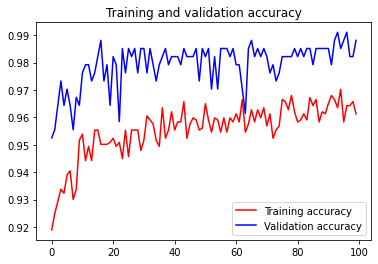

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

14/14 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9810
[0.06657517701387405, 0.980997622013092]


#Test Case

In [ ]:
inp=[]
inp=[1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1] 
inp=np.array(inp)
#model.predict(reshape(inp))

# Generate predictions for samples
predictions = model.predict(inp.reshape(-1,18))

print(predictions)

[[0.99989796]]


#Save Model to tflite for Android

In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('COOVID-19.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp28jqdpi1/assets


3060